In [10]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img

In [5]:
labels_df = pd.read_parquet("/Users/kailashkumar/Downloads/week4/easy-500/labels.parquet")
labels_df.head(), labels_df['image_id'].value_counts(), labels_df['class'].value_counts()

(   image_id    x    y  orientation  radius  class
 0         0  269  450     0.000000      17      0
 1         0  533  299     0.663225      45      1
 2         0  539  427     0.610865      46      1
 3         0  365  148     0.488692      45      1
 4         0  472  136     2.426008      40      1,
 image_id
 0      23
 329    23
 342    23
 341    23
 340    23
        ..
 161    23
 160    23
 159    23
 158    23
 499    23
 Name: count, Length: 500, dtype: int64,
 class
 1    5500
 2    5500
 0     500
 Name: count, dtype: int64)

In [6]:
labels_df[labels_df['image_id']==0]

,image_id,x,y,orientation,radius,class
0,0,269,450,0.000000,17,0
1,0,533,299,0.663225,45,1
2,0,539,427,0.610865,46,1
3,0,365,148,0.488692,45,1
4,0,472,136,2.426008,40,1
5,0,846,448,4.660029,41,1
6,0,613,248,6.003933,41,1
7,0,287,214,2.391101,48,1
8,0,657,387,5.393067,44,1
9,0,752,311,2.792527,41,1


In [14]:
labels_df.columns

Index(['image_id', 'x', 'y', 'orientation', 'radius', 'class'], dtype='object')

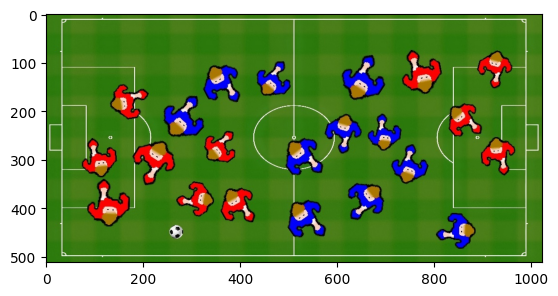

In [12]:
image = img.imread("/Users/kailashkumar/Downloads/week4/easy-500/images/0.jpg")
plt.imshow(image);


In [25]:
list = labels_df.values.tolist()
image_1_labels = list[:23]
image_1_labels

[[0.0, 269.0, 450.0, 0.0, 17.0, 0.0],
 [0.0, 533.0, 299.0, 0.6632251157578453, 45.0, 1.0],
 [0.0, 539.0, 427.0, 0.6108652381980153, 46.0, 1.0],
 [0.0, 365.0, 148.0, 0.4886921905584123, 45.0, 1.0],
 [0.0, 472.0, 136.0, 2.426007660272118, 40.0, 1.0],
 [0.0, 846.0, 448.0, 4.6600291028248595, 41.0, 1.0],
 [0.0, 613.0, 248.0, 6.003932626860494, 41.0, 1.0],
 [0.0, 287.0, 214.0, 2.3911010752322315, 48.0, 1.0],
 [0.0, 657.0, 387.0, 5.3930673886624785, 44.0, 1.0],
 [0.0, 752.0, 311.0, 2.792526803190927, 41.0, 1.0],
 [0.0, 657.0, 134.0, 2.5656340004316642, 49.0, 1.0],
 [0.0, 699.0, 245.0, 3.01941960595019, 38.0, 1.0],
 [0.0, 308.0, 382.0, 4.537856055185257, 39.0, 2.0],
 [0.0, 926.0, 116.0, 6.021385919380437, 39.0, 2.0],
 [0.0, 398.0, 398.0, 0.5061454830783556, 42.0, 2.0],
 [0.0, 774.0, 120.0, 3.3335788713091694, 47.0, 2.0],
 [0.0, 221.0, 307.0, 5.724679946541401, 48.0, 2.0],
 [0.0, 129.0, 390.0, 3.1066860685499065, 49.0, 2.0],
 [0.0, 362.0, 275.0, 2.234021442552742, 38.0, 2.0],
 [0.0, 173.0, 181

In [26]:
# Load the image (replace 'image_path' with the actual path to your image)
image_path = '/Users/kailashkumar/Downloads/week4/easy-500/images/0.jpg'
image = cv2.imread(image_path)

# Define a dictionary to store the labels for each class
class_labels = {
    0: [],  # Ball
    1: [],  # Team 1
    2: []   # Team 2
}

# Separate the data into different classes
for id, x, y, orientation, radius, class_id in image_1_labels:
    class_labels[class_id].append((x, y, orientation, radius))

# Define colors for each class
colors = {
    0: (0, 255, 0),   # Green for the ball
    1: (255, 0, 0),   # Blue for Team 1
    2: (0, 0, 255)    # Red for Team 2
}

# Draw bounding circles and orientation lines
for class_id, labels in class_labels.items():
    color = colors[class_id]
    for x, y, orientation, radius in labels:
        # Draw the bounding circle
        cv2.circle(image, (int(x), int(y)), int(radius), color, 2)

        # Draw a line to indicate the orientation
        cv2.line(image, (int(x), int(y)), (int(x + radius * np.cos(orientation)), int(y + radius * np.sin(orientation))), color, 2)

# Display the image with bounding circles and orientation lines
cv2.imshow('Image with Bounding Circles and Orientation', image)
cv2.waitKey(0)
cv2.destroyAllWindows()